# TP 4 - Méthode de rejet

In [1]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt 


##  I - Simulation d'une variable aléatoire normale

Soient $f$ la densité gaussienne,
$$f(x)=\frac1{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$
et $g$ la dentité de Laplace 
$$g(x)=\frac12e^{-|x|}.$$

Détermminons le plus petit $k$ tel que 
$$\forall x\in\mathbb{R} \qquad f(x)\leqslant kg(x).$$
On pose 
$$h(x)=\frac{f(x)}{g(x)}=\sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}+|x|}.$$
On a 
$$h'(x)=\left\{\begin{array}{ll}
            \sqrt{\frac{2}{\pi}}(1-x)e^{-\frac{x^2}{2}+x} &\textrm{pour $x>0$}\\
            \sqrt{\frac{2}{\pi}}(-1-x)e^{-\frac{x^2}{2}-x} &\textrm{pour $x<0$}\\
            \end{array}
           \right.
           $$
           
   

Commençons par écrire un programme (on en donne même deux) qui simule une observation d'une va de Laplace.

In [2]:
# simulation d'une observation d'une variable aléatoire de Laplace en utlisant l'inversion de la fonction de répartition 
def Laplace():
    U=random.random()
    if U<1/2:
        Z=math.log(2*U)
    else :
        Z=-math.log(2*(1-U))
    return Z


# simulation d'une observation d'une variable aléatoire de Laplace en utlisant le fait qu'un telle variable peut se voir comme 
# le produite d'une va exponentielle d'une va de RadeMacher (va qui vaut 1 ou -1 avec proba 1/2)
def Laplace2():
    E=math.log(random.random()) # simulation d'une va exponentielle de paramètre 1
    U=random.random()           # simulation d'une Rademacher R
    if U<1/2:
        R=-1
    else :
        R=1
    return E*R


Simulation d'une variable aléatoire Normale centrée réduite par la méthode de rejet

In [3]:

def Normale(N):
    coef=1/math.sqrt(2*math.pi)       # le coefficient de normalisation de la gaussienne
        
    k=math.sqrt(2*math.e/math.pi)  # coeficient k
    
    L=[]
    while(len(L)<N):               # tant qu'on a pas simulé assez d'observation
        Z=Laplace2()                              #on simule une observation d'une va de Laplace Z
        Y=random.random()*k*1/2*math.exp(-abs(Z))  #on simule une obervation d'unevariable aléaoire Y de loi uniforme sur [0,kg(Z)]
        if Y<math.exp(-Z**2/2)*coef:  #On compare Y avec f(Z)
            L.append(Z)            #Si Y<f(Z), Z est une obervation . On l'ajoute au tableau
    return L

In [4]:
Normale(5)

[0.39032374732149117,
 -0.5696579057608406,
 -0.7814769432342566,
 0.9023707756023818,
 2.1741404319416784]

Notre échantillon a pour moyenne empirique -0.0007547507485198026  et pour variance empirique 1.000874758184079


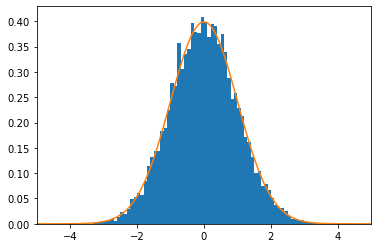

In [12]:
#Simulation de la variable 
NObs=10000 #Nombre d'obervations
G=Normale(NObs)

print("Notre échantillon a pour moyenne empirique",np.mean(G)," et pour variance empirique", np.var(G))


# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=math.floor(min(G))-1
b=math.floor(max(G))+1
Delta=0.1
NCase=int((b-a)/Delta)

# paramétrage la l'affichage
A=-5
B=5
plt.xlim(A,B)
#plt.ylim(0,1)

plt.hist(G,range=(a,b),bins=NCase,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))  #

plt.show()

## II - Simulation d'une variable aléatoire Beta ($\alpha$, $\beta$)

On considère 
$$f(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}1_{[0,1]}(x)$$
la densité de la loi Beta et 
$$g(x)=1_{[0,1]}(x)$$
la densité de la loi uniforme sur $[0,1]$. 

On pose $h(x)=\frac{f(x)}{g(x)} =f(x)$.

On a, sur $]0,1[$,
$$
\begin{array}{rcl}
h'(x)&=&\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
    \big(
    (\alpha-1)x^{\alpha-2}(1-x)^{\beta-1}
    _
     (\beta-1)x^{\alpha-1}(1-x)^{\beta-2}
     \big)\\
     &=&
      \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}  
    [(\alpha-1)(1-x)-(\beta-1)x]x^{\alpha-2}(1-x)^{\beta-2}].
     \\
      &=&
      \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}  
    [-(\alpha+\beta-2)x+\alpha-1]x^{\alpha-2}(1-x)^{\beta-2}].
     \\
\end{array}
$$

Pour $\alpha>1$ et $\beta>1$ le max est donc atteint pour $x_M=\frac{\alpha-1}{\alpha+\beta-2}$ et on a donc 
$$f(x)\leqslant Cg(x)$$
avec $C=h(x_M)$.

In [24]:
def Beta(alpha,beta,N):
    Cst=math.gamma(alpha+beta)/(math.gamma(alpha)*math.gamma(beta)  )      # le coefficient de normalisation 
    
    xM=(alpha-1)/(alpha+beta-2)   #n calcule la meilleure constante C telle que f(x)< Cg(x)
    C=Cst*xM**(alpha-1)*(1-xM)**(beta-1)                         #
                              
    L=[]       
    while(len(L)<N):               # tant qu'on a pas simulé assez d'observation
        Z=random.random()    #on simule une observation d'un loi uniforme sur [0,1]
        Y=random.random()*C  #on simule une obervation d'une variable aléatoire Y de loi uniforme sur [0,kg(Z)]
        if Y<Cst*Z**(alpha-1)*(1-Z)**(beta-1):  #On compare Y avec f(Z)
            L.append(Z)            #Si Y<f(Z), Z est une obervation . On l'ajoute au tableau
    return L

Notre échantillon a pour moyenne empirique 0.3005404277613161  et pour variance empirique 0.034978732932863


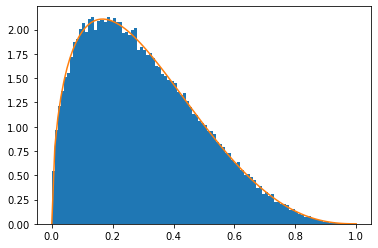

In [25]:
#Simulation de la variable 
NObs=100000 #Nombre d'obervations

alpha=1.5
beta=3.5
Cst=math.gamma(alpha+beta)/(math.gamma(alpha)*math.gamma(beta)  ) 

B=Beta(alpha,beta,NObs)

print("Notre échantillon a pour moyenne empirique",np.mean(B)," et pour variance empirique", np.var(B))


# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=0
b=1
Delta=0.01
NCase=int((b-a)/Delta)

# paramétrage la l'affichage
#A=-5
#B=5
#plt.xlim(A,B)
#plt.ylim(0,1)

plt.hist(B,range=(a,b),bins=NCase,density=True)

x=np.linspace(a,b,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,Cst*x**(alpha-1)*(1-x)**(beta-1))  #

plt.show()